In [1]:
from construct_eq_fpr_df import construct_df_for_eq_div_fpr
from construct_eq_fpr_df import get_fpr_eq_div
from get_data_fico import get_fpr_tpr_fico
from get_data_fico import get_base_rates
from get_data_fico import get_totals
import matplotlib.pylab as plt 
#from responsibly.dataset import build_FICO_dataset
from fairmlbook.code.creditscore_compas import criteria
from onehalfthreshold import get_optimal_fp_tp
from onehalfthreshold import get_optimal_fp_tp_hardtf
from onehalfthreshold import get_indices_for_a_opt
from onehalfthreshold import get_fpa_opt_tpa_opt_thres_a_opt
from matplotlib.font_manager import FontProperties
import pandas as pd 
import numpy as np 

unable to import 'smart_open.gcs', disabling that module
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [2]:
%%markdown
# Data 

# Data 


In [3]:
list_attrs = ['Asian','Hispanic','Black','White']

fpr_df, tpr_df = get_fpr_tpr_fico()
data_fpr_Asian = fpr_df['Asian']
data_tpr_Asian = tpr_df['Asian']

data_fpr_Hispanic = fpr_df['Hispanic']
data_tpr_Hispanic = tpr_df['Hispanic']

data_fpr_Black = fpr_df['Black']
data_tpr_Black = tpr_df['Black']

data_fpr_White = fpr_df['White']
data_tpr_White = tpr_df['White']

#fraction of non-defaulters in each group 
fraction_non_defaulters = get_base_rates()

totals = get_totals()

In [4]:
eq_fpr_df = construct_df_for_eq_div_fpr(fpr_df,tpr_df,division=0.001)
print(eq_fpr_df)

Index(['Asian', 'Black', 'Hispanic', 'White'], dtype='object')
       Asian_tpr Asian_threshold  Black_tpr Black_threshold Hispanic_tpr  \
0.000          0             101          0             100            0   
0.001  0.0284424         97.8493  0.0569956         88.8561    0.0566159   
0.002    0.05543         96.0177  0.0962776         83.1231    0.0930819   
0.003  0.0808284         94.2304   0.137937         77.6382     0.121975   
0.004   0.105064         92.3585   0.169887         73.7316     0.147034   
...          ...             ...        ...             ...          ...   
0.995    0.99993        0.893144   0.999933        0.617852     0.999943   
0.996   0.999944        0.814515   0.999948        0.588004     0.999954   
0.997   0.999958        0.735886   0.999963        0.558156     0.999966   
0.998   0.999972        0.657258   0.999979        0.528308     0.999978   
0.999   0.999986        0.578629   0.999993        0.475461     0.999989   

      Hispanic_threshold

In [5]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

       Asian_tpr  Black_tpr Hispanic_tpr  White_tpr
0.000          0          0            0          0
0.001  0.0284424  0.0569956    0.0566159  0.0317237
0.002    0.05543  0.0962776    0.0930819  0.0609469
0.003  0.0808284   0.137937     0.121975  0.0877923
0.004   0.105064   0.169887     0.147034   0.113204
...          ...        ...          ...        ...
0.995    0.99993   0.999933     0.999943   0.999968
0.996   0.999944   0.999948     0.999954   0.999974
0.997   0.999958   0.999963     0.999966   0.999981
0.998   0.999972   0.999979     0.999978   0.999987
0.999   0.999986   0.999993     0.999989   0.999994

[1000 rows x 4 columns]


In [6]:
%%markdown 
## Pointwise minimum curves 

## Pointwise minimum curves 


In [7]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div(division=0.001))
min_tpr = list(pointwise_min_df)

0.000    0.000000
0.001    0.028442
0.002    0.055430
0.003    0.080828
0.004    0.105064
           ...   
0.995    0.999930
0.996    0.999944
0.997    0.999958
0.998    0.999972
0.999    0.999986
Length: 1000, dtype: float64


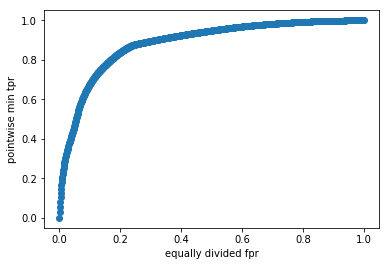

In [8]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

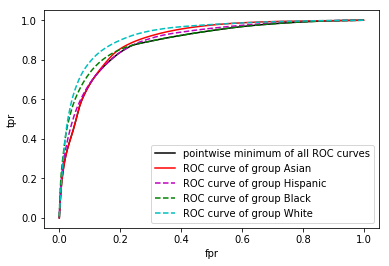

In [9]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [10]:
%%markdown
## Optimal false positive and true positive

## Optimal false positive and true positive


In [11]:
%%markdown 
## Optimal false positive and true positive rates output from semi-threshold classifier framework

## Optimal false positive and true positive rates output from semi-threshold classifier framework


In [12]:
target_rate = 5/6 #(this means loss from loaning to defaulter is 6 times as expensive as for profit from loaning to non-defaulter)
profit_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
print('optimal fp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_fp_semi)
print('optimal tp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_tp_semi)
print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)

optimal fp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.115
optimal tp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.7115204936866923
optimal profit from semi-threshold classifiers with target rate:0.8333333333333334= 10857.872311365543


In [13]:
%%markdown 
## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


In [14]:
DATA_DIR='fairmlbook/code/creditscore_compas/data/'
def cleanup_frame(frame):
    """Rename and re-order columns"""
    frame = frame.rename(columns={'Non- Hispanic white': 'White'})
    frame = frame.reindex(['Asian', 'Black', 'Hispanic', 'White'], axis=1)
    return frame

def read_totals():
    """Read the total number of people of each race"""
    frame = cleanup_frame(pd.read_csv(DATA_DIR+files['overall'], index_col=0))
    return {r:frame[r]['SSA'] for r in frame.columns}

def parse_data(data_dir=DATA_DIR):
    """Parse sqf data set."""

    cdfs = cleanup_frame(pd.read_csv(data_dir+files['cdf_by_race'], index_col=0))
    performance = 100-cleanup_frame(pd.read_csv(data_dir+files['performance_by_race'], index_col=0))
    return (cdfs/100., performance/100.)

files = dict(cdf_by_race = 'transrisk_cdf_by_race_ssa.csv',
             performance_by_race = 'transrisk_performance_by_race_ssa.csv',
             overall = 'totals.csv')

cdfs = cleanup_frame(pd.read_csv(DATA_DIR+files['cdf_by_race'], index_col=0))
performance = 100-cleanup_frame(pd.read_csv(DATA_DIR+files['performance_by_race'], index_col=0))

data_pair = parse_data()
totals = read_totals()

In [15]:
data = criteria.CriteriaData(data_pair[0], data_pair[1], totals)
result = data.two_sided_optimum(target_rate) #same target rate we used for semi-threshold classifiers 
loss_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', loss_hps)

optimal fp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.11393540338532593
optimal tp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.709169501828308
optimal profit from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 10859.386833243714


In [16]:
%%markdown
## Plot data 

## Plot data 


In [17]:
%%markdown 
### Single target rate

### Single target rate


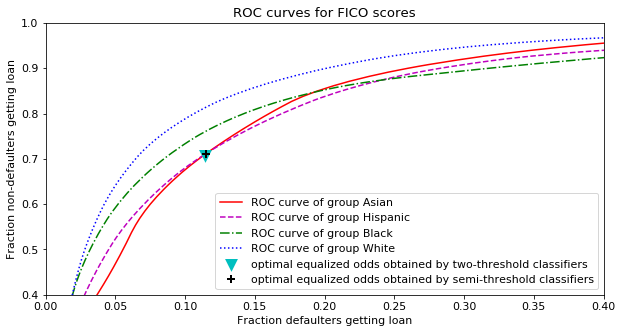

In [18]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.rcParams.update({'font.size': 11})
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':b',label='ROC curve of group White')
plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8,label = 'optimal equalized odds obtained by two-threshold classifiers')
plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8,label = 'optimal equalized odds obtained by semi-threshold classifiers')
plt.legend(loc=0)
plt.xlim([0.0,0.4])
plt.ylim([0.4,1])

plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
#f.savefig('figures/zoomed_fico_tr_2_3.png')
#f.savefig('figures/fico_tr_2_3.png')

In [19]:
%%markdown
## Many target rates 

## Many target rates 


0.000& 0.999& 0.999&1.000& 1.000& 1.000 \\ \hline
0.020& 0.999& 0.999&1.000& 1.000& 1.000 \\ \hline
0.040& 0.982& 0.982&1.000& 1.000& 1.000 \\ \hline
0.060& 0.921& 0.921&0.998& 0.998& 1.000 \\ \hline
0.080& 0.904& 0.904&0.998& 0.998& 1.000 \\ \hline
0.100& 0.883& 0.883&0.997& 0.997& 1.000 \\ \hline
0.120& 0.862& 0.862&0.996& 0.996& 1.000 \\ \hline
0.140& 0.811& 0.811&0.993& 0.992& 1.000 \\ \hline
0.160& 0.785& 0.785&0.990& 0.990& 1.000 \\ \hline
0.180& 0.777& 0.777&0.990& 0.990& 1.000 \\ \hline
0.200& 0.710& 0.710&0.983& 0.983& 1.000 \\ \hline
0.220& 0.683& 0.683&0.980& 0.980& 1.000 \\ \hline
0.240& 0.665& 0.666&0.978& 0.978& 1.000 \\ \hline
0.260& 0.629& 0.629&0.973& 0.973& 1.000 \\ \hline
0.280& 0.601& 0.601&0.968& 0.968& 1.000 \\ \hline
0.300& 0.586& 0.586&0.966& 0.966& 1.000 \\ \hline
0.320& 0.561& 0.561&0.961& 0.961& 1.000 \\ \hline
0.340& 0.498& 0.498&0.947& 0.947& 1.000 \\ \hline
0.360& 0.456& 0.456&0.938& 0.938& 1.000 \\ \hline
0.380& 0.404& 0.404&0.925& 0.925& 1.000 \\ \hline


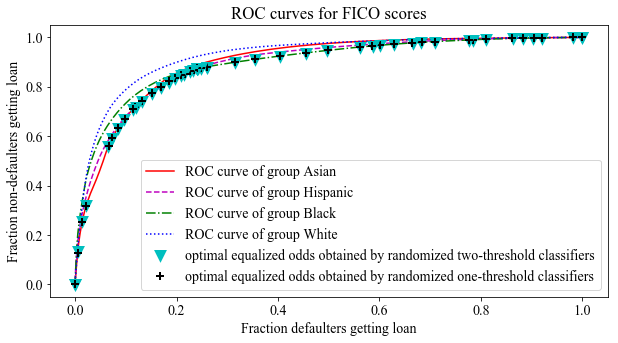

In [26]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':b',label='ROC curve of group White')

for target_rate in np.arange(0,1.02,0.02):
    loss_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
    result = data.two_sided_optimum(target_rate) #same target rate we used for semi-threshold classifiers 
    loss_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
    
    if(loss_semi < loss_hps):
        loss_hps = loss_semi 
        opt_tp_hps = opt_tp_semi
        opt_fp_hps = opt_fp_semi
    
    plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8)
    plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8)
    
    #print('optimal fp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_fp_semi)
    #print('optimal tp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_tp_semi)
    #print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)
    
   # print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
   # print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
   # print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', profit_hps)
    
    #correcting the numerical error of hps 
   # print(loss_semi)
   # print(opt_fp_semi)
   # print(opt_tp_semi)
   # print(loss_hps)
    
    print("{:.3f}".format(target_rate) + '& ' + "{:.3f}".format(opt_fp_semi) + '& ' + "{:.3f}".format(opt_fp_hps) + '&' + 
          "{:.3f}".format(opt_tp_semi) + '& ' +  "{:.3f}".format(opt_tp_hps) + '& ' + "{:.3f}".format(loss_semi/loss_hps) + " \\\ \hline")
    
plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8,label = 'optimal equalized odds obtained by randomized two-threshold classifiers')
plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8,label = 'optimal equalized odds obtained by randomized one-threshold classifiers')

plt.legend(loc=0)

plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
f.savefig('figures/diff_cost_ratios_FICO',dpi=300)

In [ ]:
%%markdown 
## Find threshold and probability of semi-threshold classifier for each attribute (at diff target rates)

In [23]:
#Opt values for different loss function ratios! 
target_rate_list = np.arange(0.00,1.00,0.02)
opt_fp_list = []
opt_tp_list = []

for i in range(0, len(target_rate_list)):
    loss,opt_semi_fp, opt_semi_tp = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate_list[i],pointwise_min_df, eq_fpr) 
    print('optimal fp:', opt_semi_fp)
    print('optimal tp:', opt_semi_tp)
    opt_fp_list.append(opt_semi_fp)
    opt_tp_list.append(opt_semi_tp)
    

optimal fp: 0.999
optimal tp: 0.9999860137505612
optimal fp: 0.999
optimal tp: 0.9999860137505612
optimal fp: 0.982
optimal tp: 0.999732174876328
optimal fp: 0.921
optimal tp: 0.9982716412728316
optimal fp: 0.904
optimal tp: 0.9977169379644982
optimal fp: 0.883
optimal tp: 0.9968450287677656
optimal fp: 0.862
optimal tp: 0.9957784434635968
optimal fp: 0.811
optimal tp: 0.9925188101742645
optimal fp: 0.785
optimal tp: 0.9904865000695423
optimal fp: 0.777
optimal tp: 0.9897865008569892
optimal fp: 0.71
optimal tp: 0.9830094537636259
optimal fp: 0.683
optimal tp: 0.9798758794801565
optimal fp: 0.665
optimal tp: 0.977609690070743
optimal fp: 0.629
optimal tp: 0.9726138416599581
optimal fp: 0.601
optimal tp: 0.9681855101169683
optimal fp: 0.586
optimal tp: 0.9655506558400779
optimal fp: 0.561
optimal tp: 0.9607585763789561
optimal fp: 0.498
optimal tp: 0.9473476314099983
optimal fp: 0.456
optimal tp: 0.937585368680248
optimal fp: 0.404
optimal tp: 0.9245491277679175
optimal fp: 0.355
optima

0.000 & 0.579 & 1.000 & 0.537 & 1.000 & 0.475 & 1.000 & 0.529 & 1.000 \\ \hline
0.020 & 0.579 & 1.000 & 0.537 & 1.000 & 0.475 & 1.000 & 0.529 & 1.000 \\ \hline
0.040 & 1.159 & 1.000 & 1.091 & 1.000 & 1.002 & 1.000 & 1.101 & 1.000 \\ \hline
0.060 & 3.164 & 0.999 & 2.494 & 1.000 & 1.496 & 1.000 & 2.747 & 0.999 \\ \hline
0.080 & 3.681 & 0.999 & 3.103 & 1.000 & 1.989 & 1.000 & 3.302 & 0.999 \\ \hline
0.100 & 4.345 & 0.999 & 3.610 & 1.000 & 2.492 & 1.000 & 3.919 & 0.998 \\ \hline
0.120 & 5.234 & 0.998 & 4.218 & 0.999 & 3.007 & 1.000 & 4.599 & 0.998 \\ \hline
0.140 & 6.456 & 0.996 & 5.609 & 0.999 & 3.991 & 1.000 & 5.992 & 0.996 \\ \hline
0.160 & 7.491 & 0.994 & 6.196 & 0.998 & 4.504 & 1.000 & 6.669 & 0.994 \\ \hline
0.180 & 7.746 & 0.994 & 6.407 & 0.998 & 4.982 & 1.000 & 7.017 & 0.994 \\ \hline
0.200 & 11.120 & 0.989 & 8.473 & 0.996 & 6.000 & 1.000 & 9.464 & 0.990 \\ \hline
0.220 & 12.066 & 0.987 & 9.802 & 0.995 & 6.497 & 1.000 & 10.674 & 0.988 \\ \hline
0.240 & 12.476 & 0.985 & 10.604 & 0.9

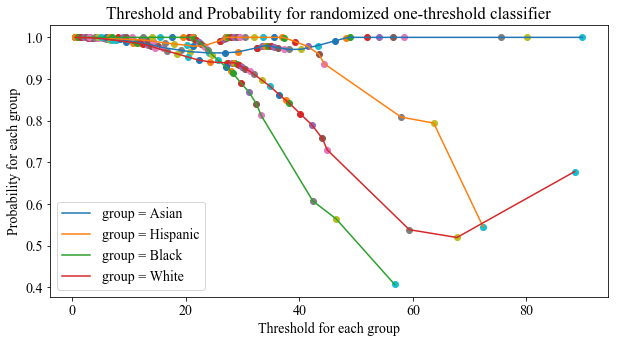

In [24]:
ta_pa_attr_dict = {'Asian': ([],[]), 'Hispanic': ([],[]), 'Black':([],[]), 'White': ([],[])}
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
line_for_table = ''
for i in range(0,len(opt_fp_list)):
    target_rate = target_rate_list[i]
    line_for_table = "{:.3f}".format(target_rate)
    opt_slope = opt_tp_list[i]/opt_fp_list[i]
   # print(target_rate)
   # print('Opt ratio: ',opt_slope)
    same_opt_ratio_ta = []
    same_opt_ratio_pa = []
    for attr in list_attrs: 
        tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
        found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr) - 1)
        threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
        fpr_1 = eq_fpr[found_index_1]
        fpr_2 = eq_fpr[found_index_2]
        tpr_1 = tp_attr_list[found_index_1]
        tpr_2 = tp_attr_list[found_index_2]
        threshold_1 = threshold_attr_list[found_index_1]
        threshold_2 = threshold_attr_list[found_index_2]
        fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
        p_a = opt_fp_list[i]/fpa_opt #=opt_tp/tpa_opt
        same_opt_ratio_ta.append(threshold_a_opt)
        same_opt_ratio_pa.append(p_a)
        ta_pa_attr_dict[attr][0].append(p_a)
        ta_pa_attr_dict[attr][1].append(threshold_a_opt)
       # print('Opt false positive one threshold for group '+attr+':',fpa_opt)
      # print('Opt true positive one threshold for group '+attr+':',tpa_opt)
        #print('Opt threshold one threshold for group '+attr+':',threshold_a_opt)
       # print('Opt probablity p_a group '+attr+':',p_a)
        
        line_for_table += ' & ' + "{:.3f}".format(threshold_a_opt) + ' & ' + "{:.3f}".format(p_a)
    
    print(line_for_table + " \\\ \hline")
    plt.plot(same_opt_ratio_ta,same_opt_ratio_pa,'o')
    
for attr,val in ta_pa_attr_dict.items():
    plt.plot(ta_pa_attr_dict[attr][1],ta_pa_attr_dict[attr][0],'-',label='group = '+attr)

plt.legend(loc=0)

plt.title('Threshold and Probability for randomized one-threshold classifier')
plt.xlabel('Threshold for each group')
plt.ylabel('Probability for each group')    
plt.show()

#f.savefig('figures/threshold_prob_fico',dpi=300)
#f.savefig('figures/threshold_prob_fico_samecolloss',dpi=300)
    

In [ ]:
%%markdown 
### Plot threshold vs loss ratio 

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10, 7))
fig.suptitle('Thresholds of randomized one-threshold classifier for each demographic')
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
axs[0,0].plot(target_rate_list,ta_pa_attr_dict['Hispanic'][1],'o')
axs[0,0].set_title('Hispanic')
axs[0,1].plot(target_rate_list,ta_pa_attr_dict['Asian'][1],'o')
axs[0,1].set_title('Asian')
axs[1,0].plot(target_rate_list,ta_pa_attr_dict['Black'][1],'o')
axs[1,0].set_title('Black')
axs[1,1].plot(target_rate_list,ta_pa_attr_dict['White'][1],'o')
axs[1,1].set_title('White')

for ax in axs.flat:
    ax.set(xlabel='Cost ratio', ylabel='Threshold')

for ax in axs.flat:
    ax.label_outer()
#plt.ylabel('Threshold')
#plt.xlabel('Cost ratio of false positives and false negatives')  
plt.show()  
#fig.savefig('figures/threshold_fico_loss_atrrs',dpi=300)

In [ ]:
### Plot probability vs loss ratio

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(10, 7))
fig.suptitle('Probabilities of randomized one-threshold classifier for each demographic')
plt.rcParams.update({'font.size': 10})
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
axs[0,0].plot(target_rate_list,ta_pa_attr_dict['Hispanic'][0],'o')
axs[0,0].set_ylim(0.4,1.09)
axs[0,0].set_title('Hispanic')
axs[0,1].plot(target_rate_list,ta_pa_attr_dict['Asian'][0],'o')
axs[0,1].set_ylim(0.4,1.09)
axs[0,1].set_title('Asian')
axs[1,0].plot(target_rate_list,ta_pa_attr_dict['Black'][0],'o')
axs[1,0].set_ylim(0.4,1.09)
axs[1,0].set_title('Black')
axs[1,1].plot(target_rate_list,ta_pa_attr_dict['White'][0],'o')
axs[1,1].set_ylim(0.4,1.09)
axs[1,1].set_title('White')

for ax in axs.flat:
    ax.set(xlabel='Cost ratio', ylabel='Probability')

for ax in axs.flat:
    ax.label_outer()
#plt.ylabel('Threshold')
#plt.xlabel('Cost ratio of false positives and false negatives')  
plt.show()  
#fig.savefig('figures/probability_fico_loss_atrrs',dpi=300)